In [1]:
'''
    箱型图

    箱型图：又称为盒须图、盒式图、盒状图或箱线图，是一种用作显示一组数据分散情况资料的统计图
    包含一组数据的：最大值、最小值、中位数、上四分位数（Q1）、下四分位数（Q3）、异常值
    ① 中位数 → 一组数据平均分成两份，中间的数
    ② 下四分位数Q1 → 是将序列平均分成四份，计算(n+1)/4与(n-1)/4两种，一般使用(n+1)/4
    ③ 上四分位数Q3 → 是将序列平均分成四份，计算(1+n)/4*3
    ④ 内限 → 在Q3+1.5IQR和Q1－1.5IQR处画两条与中位线一样的线段，这两条线段为异常值截断点，称其为内限，最大值区间Q3+1.5IQR,最小值区间Q1-1.5IQR （IQR=Q3-Q1）
    ⑤ 外限 → 在Q3+3IQR和Q1－3IQR处画两条线段，称其为外限，最大值区间Q3+3IQR,最小值区间Q1-3IQR （IQR=Q3-Q1）
    ⑥ 异常值 → 处于内限以外位置的点表示的数据都是异常值，其中在内限与外限之间的异常值为温和的异常值（mild outliers），在外限以外的为极端的异常值(extreme outliers)
    
    plt.boxplot()
'''

'\n    箱型图\n\n    箱型图：又称为盒须图、盒式图、盒状图或箱线图，是一种用作显示一组数据分散情况资料的统计图\n    包含一组数据的：最大值、最小值、中位数、上四分位数（Q1）、下四分位数（Q3）、异常值\n    ① 中位数 → 一组数据平均分成两份，中间的数\n    ② 下四分位数Q1 → 是将序列平均分成四份，计算(n+1)/4与(n-1)/4两种，一般使用(n+1)/4\n    ③ 上四分位数Q3 → 是将序列平均分成四份，计算(1+n)/4*3=6.75\n    ④ 内限 → T形的盒须就是内限，最大值区间Q3+1.5IQR,最小值区间Q1-1.5IQR （IQR=Q3-Q1）\n    ⑤ 外限 → T形的盒须就是内限，最大值区间Q3+3IQR,最小值区间Q1-3IQR （IQR=Q3-Q1）\n    ⑥ 异常值 → 内限之外 - 中度异常，外限之外 - 极度异常\n    \n    plt.plot.box(),plt.boxplot()\n'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

f:\language\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


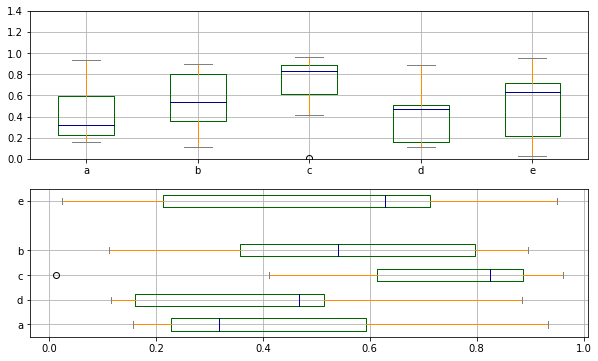

In [28]:
# df.plot.box()绘制
fig,axes = plt.subplots(2,1,figsize=(10,6))
df = pd.DataFrame(np.random.rand(10,5),columns=list('abcde'))

# 箱型图着色
color = dict(boxes='DarkGreen',whiskers='DarkOrange',medians='DarkBlue',caps='Gray')
# boxes → 箱线
# whiskers → 分位数与error bar横线之间竖线的颜色
# medians → 中位数线颜色
# caps → error bar横线颜色

# 绘图
df.plot.box(ylim=[0,1.4],
            grid=True,
            color=color,
            ax=axes[0])
# color：样式填充

df.plot.box(vert=False,
            positions=[1,4,3,2,6],
            grid=True,
            color=color,
            ax=axes[1])

# vert:是否垂直，默认True
# position:箱型图占位,观察纵坐标,columns与positions的下标是一一对应的,positions不同占位,列名就显示在不同位置

plt.show()

type(f): <class 'dict'>


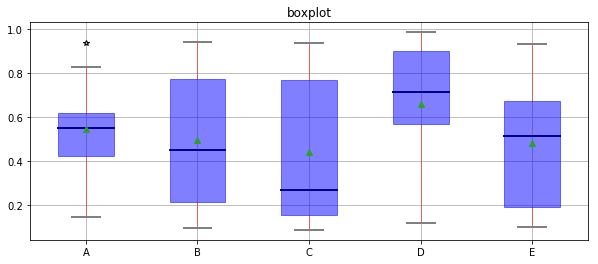

In [111]:
# plt.boxplot()绘制

# plt.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, 
#             usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, 
#             labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_xticks=True, autorange=False, 
#             zorder=None, hold=None, data=None)

df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
plt.figure(figsize=(10,4))

f = df.boxplot(sym = 'o',  # 异常点形状，参考marker
               vert = True,  # 是否垂直
               # ylim=[0,1.4],  没有此参数
               grid=True,  # 网格线 默认为True
               whis = 1.5,  # IQR，默认1.5，也可以设置区间比如[5,95]，代表强制上下边缘为数据95%和5%位置
               patch_artist = True,  # 上下四分位框内是否填充，True为填充
               meanline = False,  # 是否有均值线
               showmeans=True,  # 是否有均值线的形状
               showbox = True,  # 是否显示箱线
               showcaps = True,  # 是否显示边缘线
               showfliers = True,  # 是否显示异常值
               notch = False,  # 中间箱体是否缺口
               return_type='dict'  # 返回类型为字典
              )
plt.title('boxplot')
print('type(f):',type(f))


for box in f['boxes']:
    box.set( color='b', linewidth=1)        # 箱体边框颜色
    box.set( facecolor = 'b' ,alpha=0.5)    # 箱体内部填充颜色
for whisker in f['whiskers']:
    whisker.set(color='r', linewidth=0.5,linestyle='-')
for cap in f['caps']:
    cap.set(color='gray', linewidth=2)
for median in f['medians']:
    median.set(color='DarkBlue', linewidth=2)
for flier in f['fliers']:
    flier.set(marker='*', color='r', alpha=1.0)
# boxes, 箱线
# medians, 中位值的横线,
# whiskers, 从box到error bar之间的竖线.
# fliers, 异常值
# caps, error bar横线
# means, 均值的横线
plt.show()

       Col1      Col2  X  Y
0  0.485211  0.902296  A  A
1  0.457842  0.640964  A  B
2  0.345695  0.069647  A  A
3  0.504699  0.285816  A  B
4  0.670157  0.104700  A  A
5  0.648734  0.777723  B  B
6  0.348814  0.167399  B  A
7  0.079033  0.645634  B  B
8  0.029365  0.100930  B  A
9  0.068244  0.429756  B  B


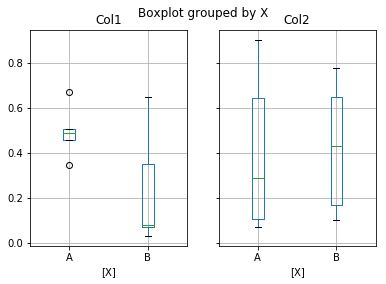

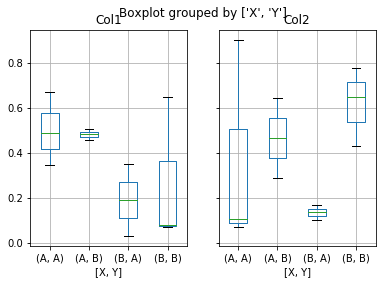

In [86]:
# 分组汇总

df = pd.DataFrame(np.random.rand(10,2), columns=['Col1', 'Col2'] )
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
df['Y'] = pd.Series(['A','B','A','B','A','B','A','B','A','B'])
print(df)

df.boxplot(by = 'X')  # 按列X的值分组,分为A,B两组
df.boxplot(column=['Col1','Col2'], by=['X','Y'])  # 分为4组,看坐标
# columns：按照数据的列分子图
# by：按照列分组做箱型图

plt.show()

----bplot['boxes']----: [<matplotlib.patches.PathPatch object at 0x000001C84335AC88>, <matplotlib.patches.PathPatch object at 0x000001C841F234A8>, <matplotlib.patches.PathPatch object at 0x000001C8420BD278>]


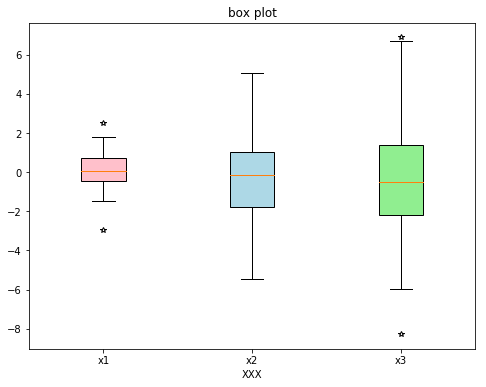

In [125]:
# 为不同的箱体填充不同颜色

# 构造数据
data = [np.random.normal(0,std,100) for std in range(1,4)]  # 标准差为[1,2,3]
fig,axes = plt.subplots(1,1,figsize=(8,6))
bplot = plt.boxplot(data,notch=False,sym='*',vert=True,patch_artist=True) 
# patch_artist:默认为None,是否给箱体填充颜色

plt.xticks(ticks=[y+1 for y in range(len(data))],labels=['x1','x2','x3'])  #  设置x轴的当前刻度位置和标签
plt.xlabel('XXX')  # 设置x轴的标签
plt.title('box plot')  # 设置标题

# 上面三行代码效果同如下代码:
# plt.setp(axes,xticks=[y+1 for y in range(len(data))],xticklabels=['x1','x2','x3'],xlabel='XXX',title='box plt')  


# 给箱体填充颜色
colors = ['pink','lightblue','lightgreen']
for patch, color in zip(bplot['boxes'],colors):
    patch.set_facecolor(color)
    
# bplot['boxes']:获取箱体视图列表
print("----bplot['boxes']----:",bplot['boxes'])
plt.show()

